<a href="https://colab.research.google.com/github/omeruncu1/Iris-Diabetes-Dataset-Applications/blob/main/Iris_Dataset_Desicion_Tree_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Examine the dataset
iris = load_iris()

X = iris.data # features
y = iris.target # target

In [3]:
n_classes = len(iris.target_names)
plot_colors = "ryb"

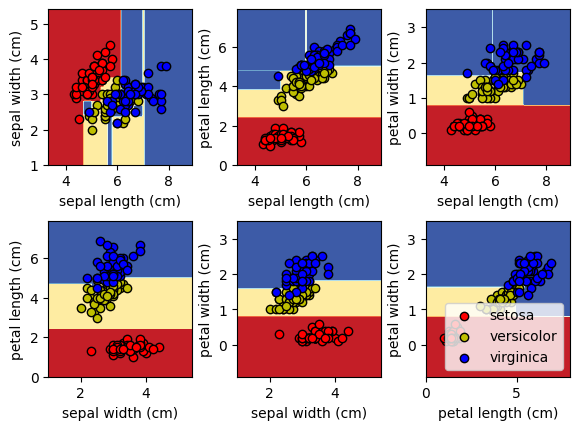

In [4]:
for pairidx, pair in enumerate([[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]):

    X = iris.data[:, pair]
    y = iris.target

    clf = DecisionTreeClassifier().fit(X, y)

    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad = 0.5, w_pad = 0.5, pad = 2.5)
    DecisionBoundaryDisplay.from_estimator(clf,
                                           X,
                                           cmap = plt.cm.RdYlBu,
                                           response_method="predict",
                                           ax=ax,
                                           xlabel=iris.feature_names[pair[0]],
                                           ylabel=iris.feature_names[pair[1]])

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label = iris.target_names[i],
                    cmap = plt.cm.RdYlBu,
                    edgecolors="black")

plt.legend()

In [5]:
# Spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
# Create and train the DT model
tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5, random_state = 42) # criterion="entropy"
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [7]:
# DT evaluation test
y_pred = tree_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of DT model trained with iris dataset: ", accuracy)

Accuracy of DT model trained with iris dataset:  1.0


In [8]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix: ")
print(conf_matrix)

Confusion matrix: 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


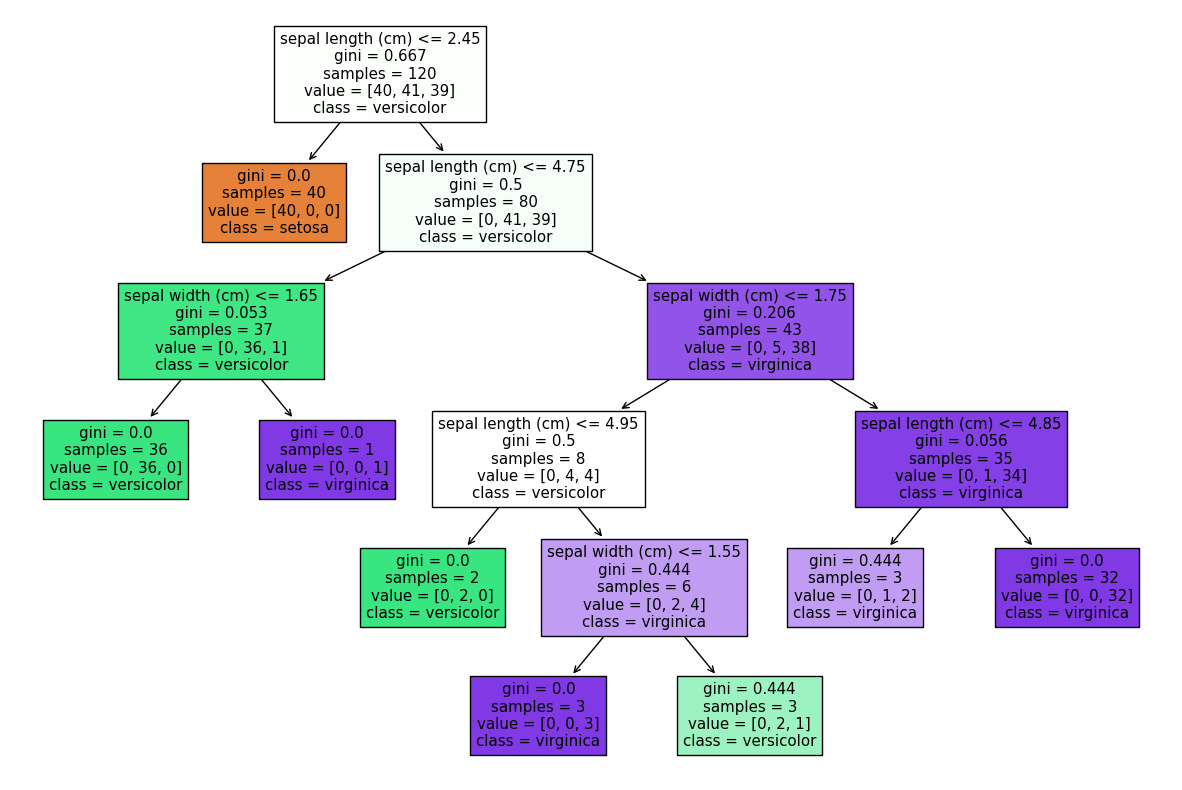

In [9]:
plt.figure(figsize = (15,10))
plot_tree(tree_clf, filled = True, feature_names = iris.feature_names, class_names = list(iris.target_names))
plt.show()

In [10]:
feature_importances = tree_clf.feature_importances_
feature_names = iris.feature_names
feature_importances_sorted = sorted(zip(feature_importances, feature_names), reverse = True)
for importance, feature_name in feature_importances_sorted:
    print(f"{feature_name}: {importance}")

sepal length (cm): 0.9201513502209823
sepal width (cm): 0.07984864977901772
